df['vod_key']가 news noun으로 뽑은 태그임

In [ ]:

#  완성된 tyde데이터를 EDA.
#   방송사 별 다큐 **막대그래프로 보기**
#   제목에서 조사를 빼고 단어만으로 **Word2back**
#   제목에서 뽑은 단어가 다큐 전체를 표현할 수 있는가?
#   에서 한 단어들을 뽑아 **그룹화하기**(가능해?)
#   통계적으로 **군집분석** 이용해보기(송이)
#   방송국별 많이 다루는 다큐는 무엇일까? 
#   EBS의 다큐 비율이 가장 높은데 이 질문이 의미가 있을까? EBS는 다양하지 않을까? 다른 방송국도 그럴까?
#   연도별로(월별은 의미 없을 듯) 어떤 다큐를 방송했을까?  
#   위의 질문에 대한 반문/ 다큐로 사회를 볼 수 있을까?

In [1]:
import pandas as pd

In [2]:
#데이터 불러오기
df = pd.read_csv('data_nountag_all_song_ver2.csv', encoding ='cp949')

'사랑','우정' -> 사랑, 우정 
으로 바꿔주는 코드

In [3]:
df['wc'] = df['vod_key']
#결측치 내용없음으로 바꿔주기
df['wc'] = df['wc'].fillna('내용없음')
#칼럼 새로 만들어주고 '' 얘네 빼주기
sentences = df['wc'].str.replace('\'','')

In [4]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = 'NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

지정된 경로를 찾을 수 없습니다.


In [5]:
#stopwords 임의로 정해준 것들
Stopwords = {'사람들','자신','우리','그들','이들','무엇','지금','프로젝트','생각','정도','공동제작','당신','의미','마음','이곳','EBS','NRK','당시','마지막','상황','스스','때문','방법','실제','대상','이야기','3부','4부','프로그램','제작','모습','그것','누구'}

In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = fontpath,
                        stopwords = Stopwords, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

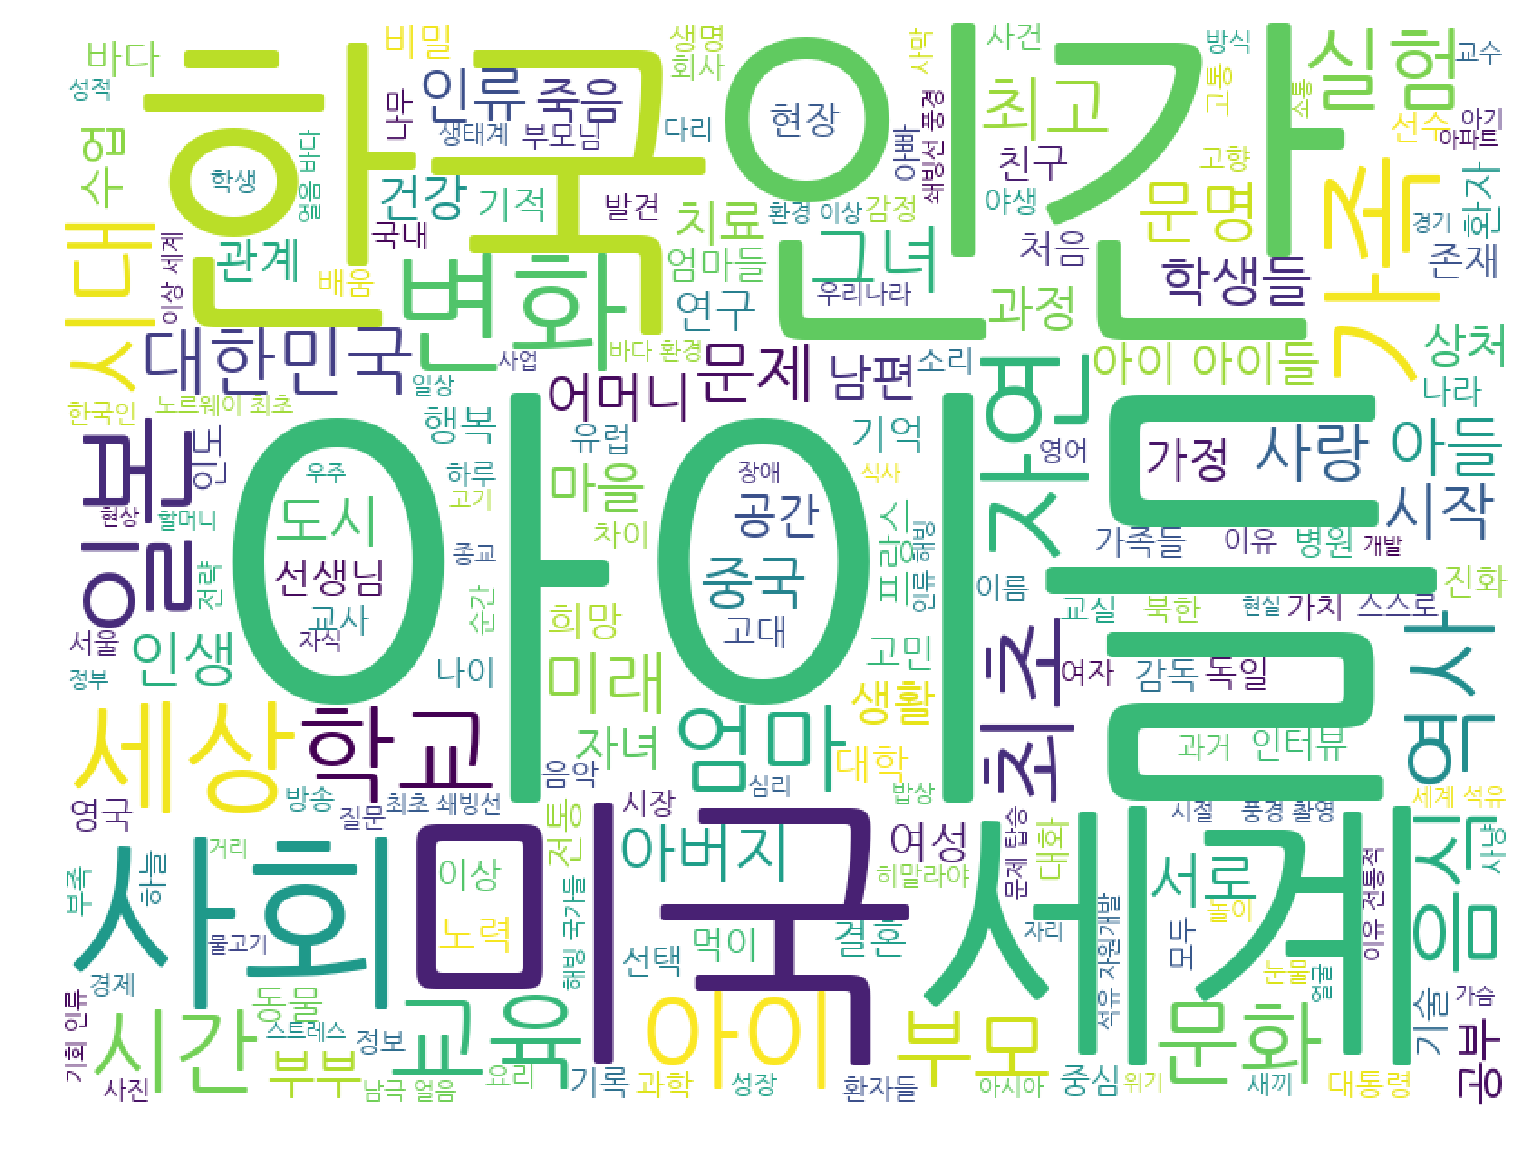

Wall time: 3.05 s


In [7]:
#그리기
%time displayWordCloud(''.join(sentences))

In [9]:
df[df['wc'].str.contains('아들')]

,Unnamed: 0,tv,title,epi,dates,links,synop,vod_key,wc
9,9.0,MBC,MBC 스페셜,6월항쟁 특집 : 어머니와 사진사,2018.06.11,http://www.imbc.com/broad/tv/culture/mbcspecia...,"■ \r\r\r\r\r\r\r\n1987년 6월, 독재 권력의 억압에 맞서 ‘...","'1987년', '그날', '거리', '최루탄', '학생', '민주주의', '역사'...","'1987년', '그날', '거리', '최루탄', '학생', '민주주의', '역사'..."
10,10.0,MBC,MBC 스페셜,"누운 배, 94일의 기록",2018.05.28,http://www.imbc.com/broad/tv/culture/mbcspecia...,■ \r\r\r\r\r\r\r\n2018년 5월 10일 오전 9시 누운 배가 ...,"'목포', '수색', '크레인', '바다', '진행', '사진', '가슴', '마음...","'목포', '수색', '크레인', '바다', '진행', '사진', '가슴', '마음..."
71,71.0,MBC,MBC 스페셜,"아버지와 나: 시베리아, 1945년",2016.08.15,http://www.imbc.com/broad/tv/culture/mbcspecia...,"1. 묻지마라, 갑자생\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\n전쟁...","'정도', '관동군', '고향', '소련', '포로', '포로수용소', '시베리아'...","'정도', '관동군', '고향', '소련', '포로', '포로수용소', '시베리아'..."
226,226.0,MBC,MBC 스페셜,"부부 솔루션 ‘이마고’, 신혼을 되돌려 드립니다",2012.06.01,http://www.imbc.com/broad/tv/culture/mbcspecia...,"OECD 이혼율 1위, 대한민국 부부는 오늘도 싸운다. \r\r\r\r\r\r\r\...","'대화', '아들', '신혼', '관계', '이마고', '솔루션', '미국', '부...","'대화', '아들', '신혼', '관계', '이마고', '솔루션', '미국', '부..."
293,293.0,MBC,MBC 스페셜,나는 한국남자와 결혼했다,2010.07.16,http://www.imbc.com/broad/tv/culture/mbcspecia...,■ \r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\n외국여성이 본격적으로 ...,"'외국', '한국', '결혼', '가정', '그들', '엄마', '사람들', '출신...","'외국', '한국', '결혼', '가정', '그들', '엄마', '사람들', '출신..."
300,300.0,MBC,MBC 스페셜,58년 개띠들의 바보인생,2010.04.02,http://www.imbc.com/broad/tv/culture/mbcspecia...,■ \r\r\r\r\r\r\n\r\r\r\r\r\r\n한국전쟁 직후인 1955년부터...,"'80만명', '시대', '개띠', '아들', '개띠들', '회사'","'80만명', '시대', '개띠', '아들', '개띠들', '회사'"
313,313.0,MBC,MBC 스페셜,"추신수, 마침내 메이저리그를 치다",2009.11.13,http://www.imbc.com/broad/tv/culture/mbcspecia...,"■ \r\r\r\r\r\r\n\r\r\r\r\r\r\n추신수, 마침내 메이저리그를 ...","'추신수', '메이저리그', '선수', '야구', '미국', '이야기', '가족',...","'추신수', '메이저리그', '선수', '야구', '미국', '이야기', '가족',..."
318,318.0,MBC,MBC 스페셜,한가위 스페셜 <곰배령 이야기>,2009.10.01,http://www.imbc.com/broad/tv/culture/mbcspecia...,■ : \r\r\r\r\r\r\n\r\r\r\r\r\r\n- 곰이 하늘을 향해 배...,"'곰배령', '도시', '자연', '야생화', '한가위', '건강', '밥상', '...","'곰배령', '도시', '자연', '야생화', '한가위', '건강', '밥상', '..."
504,504.0,SBS,SBS 스페셜,서번트 성호를 부탁해 1부 형제를 위한 소나타,2017.08.06,http://programs.sbs.co.kr/culture/sbsspecial/v...,*해당 회차는 제작진 요청으로 VOD 서비스 불가합니다. 483회서번트 성호를 부탁...,"'성호', '재능', '장애', '음악', '자신', '아들'","'성호', '재능', '장애', '음악', '자신', '아들'"
530,530.0,SBS,SBS 스페셜,"중년의 사생활, 갱년기",2016.12.11,http://programs.sbs.co.kr/culture/sbsspecial/v...,"중년의 사생활, 갱년기제작: 김진혁공작소\r\r\r\n자료조사: 신형섭[기획의도]다...","'갱년기', '당신', '증상', '남성들', '시작', '60년', '사춘기', ...","'갱년기', '당신', '증상', '남성들', '시작', '60년', '사춘기', ..."


In [ ]:
# top_key = df['vod_key'].value_counts().sort_values()
# color= ['#00FFFF']
# top_key.head(3).plot.barh(color=color);

In [13]:
bigclass = pd.read_excel('machinelearing_all_saerom.xlsx')
bigclass

,tv,title,epi,dates,links,synop,대분류
0,MBC,MBC 스페셜,"생존 체력, 약골 40대 저질체력 탈출기",2018.10.01,http://www.imbc.com/broad/tv/culture/mbcspecia...,"“마흔 살, ‘생존 체력’이 필요하다” \r\r\r\r\r\r\n ‘불혹’의 ...",의학
1,MBC,MBC 스페셜,"당신, 독을 먹고 있나요?",2018.09.10,http://www.imbc.com/broad/tv/culture/mbcspecia...,"■ \r\r\r\r\r\r\n스위트 드림(Sweet Dream), 허니문(Ho...",과학
2,MBC,MBC 스페셜,방송의 날 특집6개월 후 만납시다: 북한 결핵병원 이야기,2018.09.03,http://www.imbc.com/broad/tv/culture/mbcspecia...,"■ \r\r\r\r\r\r\n2018년, 한반도가 급변하기 시작했다. 11년 ...",정치/사회
3,MBC,MBC 스페셜,이산가족 상봉 특집 <옥류관 서울 1호점> 3부 이산,2018.08.20,http://www.imbc.com/broad/tv/culture/mbcspecia...,역사적인 4.27 남북정상회담을 계기로 8월 20일부터 26일까지 2015년 이후 ...,정치/사회
4,MBC,MBC 스페셜,도시x자연다큐멘터리Ⅰ 고냥이,2018.08.13,http://www.imbc.com/broad/tv/culture/mbcspecia...,■ \r\r\r\r\r\r\n1인 가구의 증가와 고령화 사회 속에서 반려동물과...,자연/생태
5,MBC,MBC 스페셜,강유미의 재벌 3세 탐구기,2018.07.30,http://www.imbc.com/broad/tv/culture/mbcspecia...,"■ \r\r\r\r\r\r\n \r\r\r\r\r\r\n지난 4월, 한 여성의...",정치/사회
6,MBC,MBC 스페셜,고마워요 조용필,2018.07.23,http://www.imbc.com/broad/tv/culture/mbcspecia...,가왕 조용필이 데뷔 50주년을 맞았다. 그리고 그의 곁에는 음악 인생 50년을 함께...,예술/대중문화
7,MBC,MBC 스페셜,<옥류관 서울 1호점> 2부 냉면의 민족,2018.07.16,http://www.imbc.com/broad/tv/culture/mbcspecia...,"지난 7월 9일 방송된 <옥류관 서울 1호점>은 방송인 주병진, 작곡가 돈스파이크 ...",인문
8,MBC,MBC 스페셜,<옥류관 서울 1호점> 1부 평양냉면 제일일세,2018.07.09,http://www.imbc.com/broad/tv/culture/mbcspecia...,"■ 2018 평양냉면 전성시대 \r\r\r\r\r\r\n지난 4월 27일, 남과...",정치/사회
9,MBC,MBC 스페셜,6월항쟁 특집 : 어머니와 사진사,2018.06.11,http://www.imbc.com/broad/tv/culture/mbcspecia...,"■ \r\r\r\r\r\r\n1987년 6월, 독재 권력의 억압에 맞서 ‘호헌...",역사


In [14]:
bigclass.describe()

,tv,title,epi,dates,links,synop,대분류
count,1887,1887,1887,1887,1887,1887,1887
unique,4,4,1873,1752,1542,1865,13
top,EBS,다큐프라임,그린란드의 여름 이야기 3,2016.08.15,http://www.imbc.com/broad/tv/culture/mbcspecia...,내용없음,인문
freq,926,926,2,3,346,3,343


In [15]:
category_count = bigclass['대분류'].value_counts()
category_count

인문         343
인류/문명      302
자연/생태      249
정치/사회      164
과학         134
가정         123
교육         121
예술/대중문화     99
의학          97
역사          82
경제/경영       68
학교교육        68
육아          37
Name: 대분류, dtype: int64

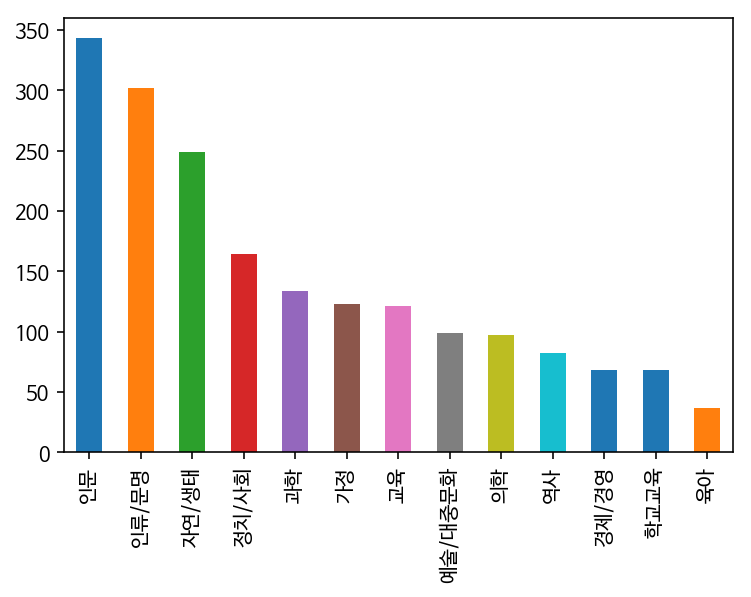

In [16]:
%matplotlib inline 
category_count.plot(kind='bar')